In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
df = pd.read_csv('Customer-Churn.csv')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
import re

df.columns = df.columns.map(lambda x: re.sub(r'(?<!^)(?=[A-Z])', '_', x))
df.columns = df.columns.str.lower()
df.rename(columns={'streaming_t_v': 'streaming_tv'}, inplace=True)

In [4]:
df

,gender,senior_citizen,partner,dependents,tenure,phone_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [5]:
df.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
monthly_charges      float64
total_charges         object
churn                 object
dtype: object

In [7]:
df['total_charges'] = df['total_charges'].replace(' ', np.nan)
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

In [8]:
df.isnull().sum()

gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

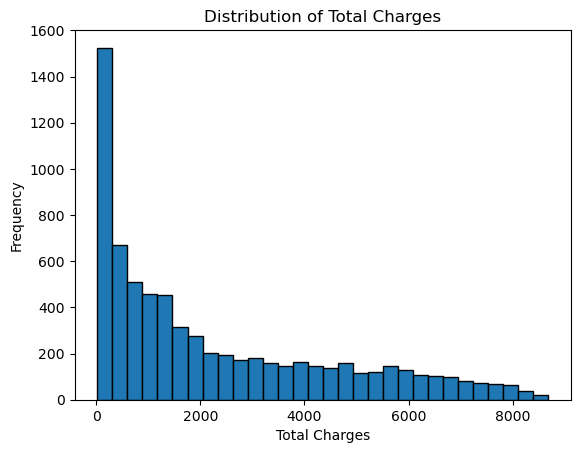

In [10]:
df_mock = df.dropna(subset=['total_charges'])

plt.hist(df_mock['total_charges'], bins=30, edgecolor='black')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

In [11]:
median = df['total_charges'].median()
df['total_charges'].fillna(median, inplace=True)

In [12]:
df.isnull().sum()

gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [13]:
data = df[['tenure', 'senior_citizen', 'monthly_charges', 'total_charges', 'churn']]

In [14]:
data['churn'] = data['churn'].map({'Yes': 1, 'No': 0})

/var/folders/3t/b6508fm16q3_3s3tkz2tb74m0000gn/T/ipykernel_30425/208456289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['churn'] = data['churn'].map({'Yes': 1, 'No': 0})


In [15]:
data['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [16]:
scaler = MinMaxScaler()

features = ['tenure', 'senior_citizen', 'monthly_charges', 'total_charges']
data[features] = scaler.fit_transform(data[features])

/var/folders/3t/b6508fm16q3_3s3tkz2tb74m0000gn/T/ipykernel_30425/3901881749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = scaler.fit_transform(data[features])


In [17]:
X = data[['tenure', 'senior_citizen', 'monthly_charges', 'total_charges']]
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Model Accuracy: 0.7771469127040455
Precision: 0.6268115942028986
Recall: 0.4505208333333333
F1 Score: 0.5242424242424242


In [20]:
data['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=100)
X_upsampled, y_upsampled = ros.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_upsampled, y_upsampled)

y_pred_upsampled = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_upsampled)
precision = precision_score(y_test, y_pred_upsampled)
recall = recall_score(y_test, y_pred_upsampled)
f1 = f1_score(y_test, y_pred_upsampled)

print("Upsampling:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}\n")

Upsampling:
Accuracy: 0.7075940383250532
Precision: 0.4757785467128028
Recall: 0.7161458333333334
F1 Score: 0.5717255717255718



In [22]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_downsampled, y_downsampled = rus.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_downsampled, y_downsampled)

y_pred_downsampled = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_downsampled)
precision = precision_score(y_test, y_pred_downsampled)
recall = recall_score(y_test, y_pred_downsampled)
f1 = f1_score(y_test, y_pred_downsampled)

print("Downsampling:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Downsampling:
Accuracy: 0.7068843151171044
Precision: 0.4752981260647359
Recall: 0.7265625
F1 Score: 0.5746652935118434
